In [20]:
import pandas as pd
import math
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = 'plotly_white'
import random

In [21]:
# read the dataset
game = pd.read_csv(r'C:\Users\Akash Pandey\Downloads\Video Games\game_datset.csv')
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [22]:
# check for null_values
game.isnull().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

In [23]:
# convert release_date and last_update to datetime

game['release_date'] = pd.to_datetime(game['release_date'])
game['last_update'] = pd.to_datetime(game['last_update'])

In [24]:
# remove image column as it will not be needed for analysis
game.drop(columns = 'img', inplace = True)

In [25]:
# fill nan values with mean or mode values
game.isnull().sum()

# fill the nan value in developer column with mode
game['developer'] = game['developer'].fillna(game['developer'].mode()[0])

# fill the nan value of critic score with median value, as mean > median which identifies that data is right skewed so it will be a safer approach.
game['critic_score'] = game['critic_score'].fillna(game['critic_score'].median())

# Since the median value of release_date has the year 2008, so we will apply '2008-01-01' value to nan 
game['release_date'] = game['release_date'].fillna('2008-01-01')
game['last_update'] = game['last_update'].fillna(game['release_date'])

# for na_sales the mean > median, which suggests that data is right skewed, filling nan with median should be considered for safer approach
game['na_sales'] = game['na_sales'].fillna(game['na_sales'].median())

# for jp_sales also the mean > median, which suggests that data is right skewed, filling nan with median should be considered for safer approach
game['jp_sales'] = game['jp_sales'].fillna(game['jp_sales'].median())

# same for pal_sales also the mean > median, which suggests that data is right skewed, filling nan with median should be considered for safer approach
game['pal_sales'] = game['pal_sales'].fillna(game['pal_sales'].median())

# same for other_sales also the mean > median, which suggests that data is right skewed, filling nan with median should be considered for safer approach
game['other_sales'] = game['other_sales'].fillna(game['other_sales'].median())

# same for total_sales also the mean > median, which suggests that data is right skewed, filling nan with median should be considered for safer approach
game['total_sales'] = game['total_sales'].fillna(game['total_sales'].median())

# now we have filled all the nan values, we can check by running the below code
# game.isnull().sum()

In [26]:
# game.columns

In [27]:
# lets analyse the total sales by genre 
total_sales_by_genre = game.groupby('genre')['total_sales'].sum().sort_values(ascending = False)


# lets visualize this
fig = go.Figure(data=[
    go.Bar(
        x = total_sales_by_genre.index,
        y = total_sales_by_genre.values,
        marker = dict(color = 'salmon')
    )
])
fig.update_layout(
    title = 'Total Sales by each genre',
    xaxis_title = 'Genre',
    yaxis_title = 'Total Sales (in Millions)',
    xaxis_tickangle = -45,
    height = 500,
    width = 800
)

In [28]:
# let's analyze the total sales as per each year
release_year = game['release_date'].dt.year

total_sales_by_year = game.groupby(release_year)['total_sales'].sum()

# lets visualize this
fig = go.Figure(data=[
    go.Scatter(
        x = total_sales_by_year.index,
        y = total_sales_by_year.values,
        mode = 'lines+markers',
        marker = dict(color = 'dodgerblue'),
        line = dict(color = 'cyan')
    )
])
fig.update_layout(
    title = 'Total Sales by each year',
    xaxis_title = 'Year',
    yaxis_title = 'Total Sales (in Millions)',
    xaxis_tickangle = 0,
    height = 500,
    width = 800
)

In [29]:
# let's analyze the other sales as per each year
release_year = game['release_date'].dt.year

total_sales_by_year = game.groupby(release_year)['other_sales'].sum()

# lets visualize this
fig = go.Figure(data=[
    go.Scatter(
        x = total_sales_by_year.index,
        y = total_sales_by_year.values,
        mode = 'lines+markers',
        marker = dict(color = 'black'),
        line = dict(color = 'blue')
    )
])
fig.update_layout(
    title = 'Other Sales by each year',
    xaxis_title = 'Year',
    yaxis_title = 'Total Sales (in Millions)',
    xaxis_tickangle = 0,
    height = 500,
    width = 800
)

In [30]:
# let's analyze the total release as per each year
release_year = game['release_date'].dt.year

total_releases_by_year = release_year.value_counts().sort_index()

# lets visualize this
fig = go.Figure(data=[
    go.Scatter(
        x = total_releases_by_year.index,
        y = total_releases_by_year.values,
        mode = 'lines+markers',
        marker = dict(color = 'blue'),
        line = dict(color = 'red')
    )
])
fig.update_layout(
    title = 'Total Releases by each year',
    xaxis_title = 'Year',
    yaxis_title = 'Total Releases',
    xaxis_tickangle = 0,
    height = 500,
    width = 800
)

In [ ]:
# Well the last 3 visuals shows that 2008 is the peak year for sales, alos most of the games were released in 2008 which clearly shows why the sales peaked in 2008

In [31]:
# let's analyse critic score for each genre
critic_score_per_genre = game.groupby('genre')['critic_score'].sum().sort_values(ascending = False)

fig = go.Figure(data=[
    go.Scatter(
        x = critic_score_per_genre.index,
        y = critic_score_per_genre.values,
        mode = 'lines+markers',
        marker = dict(color = 'forestgreen'),
        line = dict(color = 'saddlebrown')
    )
])
fig.update_layout(
    title = 'Total Critic Score for each Genre',
    xaxis_title = 'Genre',
    yaxis_title = 'Critic Score',
    xaxis_tickangle = -45,
    height = 500,
    width = 800
)

In [32]:
# let's try to analyse difference in na_sales, jp_sales and pal_sales
sales_difference = game.pivot_table(index = release_year,
                                   values = ['na_sales','jp_sales','pal_sales'],
                                   aggfunc = 'sum')

fig = go.Figure()

line_color = ['deepskyblue','crimson','green']
marker_color = ['magenta','orangered','gold']

for i, difference in enumerate(sales_difference.columns):
    fig.add_trace(
        go.Scatter(
            x=sales_difference.index,
            y=sales_difference[difference],
            mode='lines+markers',
            line=dict(color=line_color[i % len(line_color)], width=2),  # Assign color from the list
            marker=dict(color=marker_color[i % len(marker_color)], size=6),  # Matching marker color
            name=difference
        )
    )

fig.update_layout(
    title='na_sales, jp_sales and pal_sales as per years',
    xaxis_title='years',
    yaxis_title='Sales',
    height=600,
    width=800)

In [ ]:
# The above visual suggests that 2008 is the peak year of sales regardless of any region 

In [33]:
# top_10 games of all time as per sales 
top_10_sales = game.groupby('title', as_index=False)['total_sales'].sum().nlargest(10,'total_sales')

fig = go.Figure(data = [
                go.Bar(
                    x = top_10_sales['title'],
                    y = top_10_sales['total_sales'],
                    marker=dict(color='saddlebrown')
                )
])

fig.update_layout(
    title = 'top 10 Highest Selling game of all time',
    xaxis_title = 'Game',
    yaxis_title = 'Sales',
    xaxis_tickangle = -45,
    height = 500,
    width = 800
)


In [ ]:
# The above visuals shows that GTA-V is the most popular game of them all

In [34]:
# Top 10 developers with highest sale
top_10_developer_sale = game.groupby('developer', as_index = False)['total_sales'].sum().nlargest(10, 'total_sales')
top_10_developer_sale

fig = go.Figure(data = [
    go.Bar(
        x = top_10_developer_sale['developer'],
        y = top_10_developer_sale['total_sales'],
        marker = dict(color = 'teal')
    )
])
fig.update_layout(
    title = 'Top !0 Developers with Highest Total Sale',
    xaxis_title = 'Developer',
    yaxis_title = 'Total Sales',
    xaxis_tickangle = -45,
    height = 500,
    width = 800
)

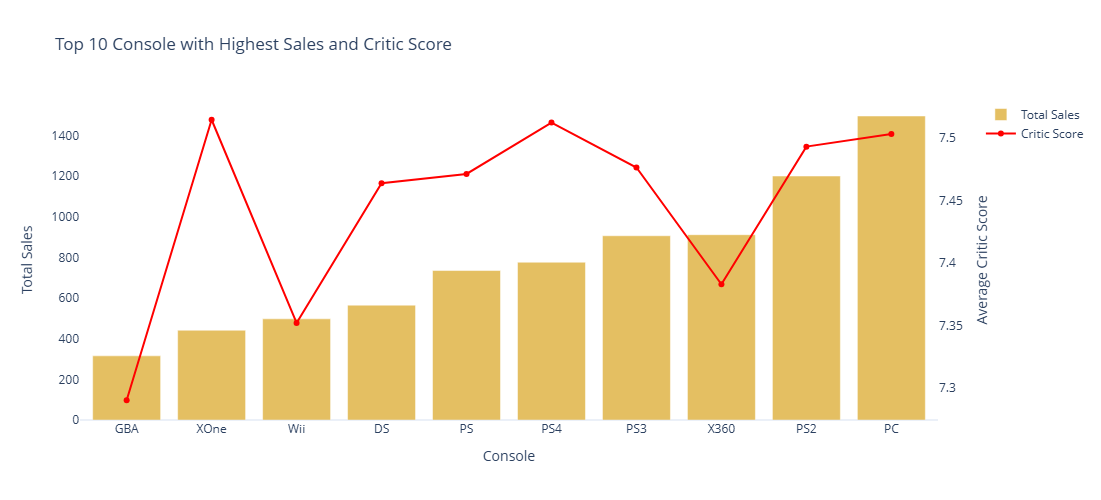

In [35]:
# top 10 console with highest sales and critic score
top_10_console_highest_sale_critic = game.groupby('console', as_index = False).agg({'total_sales': 'sum', 'critic_score': 'mean'}).nlargest(10, 'total_sales').sort_values('total_sales',ascending = True)


fig = go.Figure(data=[
    go.Bar(
        x = top_10_console_highest_sale_critic['console'],
        y = top_10_console_highest_sale_critic['total_sales'],
        marker = dict(color = 'goldenrod'),
        name='Total Sales',
        opacity = 0.7,
        yaxis = 'y1'
    )
])
fig.add_trace(
    go.Scatter(
        x = top_10_console_highest_sale_critic['console'],
        y = top_10_console_highest_sale_critic['critic_score'],
        name = 'Critic Score',
        mode = 'lines+markers',
        marker = dict(color = 'red'),
        line = dict(color = 'red'),
        yaxis = 'y2'
    )
)
fig.update_layout(
    title='Top 10 Console with Highest Sales and Critic Score',
    xaxis_title= 'Console',
    yaxis=dict(
        title='Total Sales',
        showgrid=False,
        side='left'
    ),
    yaxis2=dict(
        title='Average Critic Score',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend=dict(
        x=1.05,  
        y=1,
        orientation='v',
        xanchor='left'
    ),
    height=500,
    width=800
)

In [ ]:
# The above analysis shows that XBox One console has the highest critic score, meanwhile PC has the highest sale and 2nd highest critic Score, this clearly show people prefer PC to play games

In [37]:
# top 10 games with blow average sales
top_10_least_sales_game = game.groupby('title', as_index = False)['total_sales'].sum().query('total_sales > 0').drop_duplicates(subset=['total_sales']).nsmallest(10, 'total_sales')

fig = go.Figure(data= [
    go.Bar(
        x = top_10_least_sales_game['total_sales'],
        y = top_10_least_sales_game['title'],
        orientation='h',
        marker = dict(color = 'purple')
    )
])

fig.update_layout(
    title = 'Top 10 games with least sales',
    yaxis_title = 'Title',
    xaxis_title = 'Total Sales',
    height = 500,
    width = 800
)

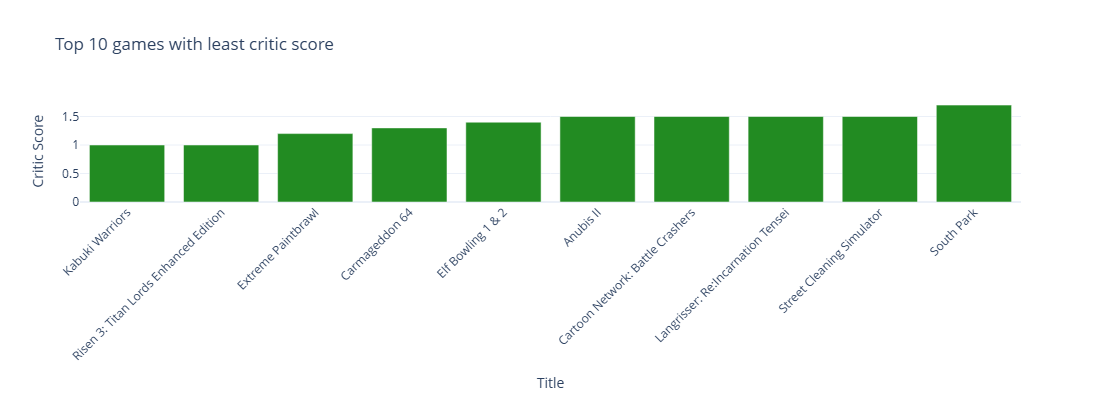

In [38]:
# top 10 least critic_score game
top_10_least_critic_game = game.groupby('title', as_index = False)['critic_score'].min().nsmallest(10, 'critic_score')
top_10_least_critic_game

fig = go.Figure(data= [
    go.Bar(
        x = top_10_least_critic_game['title'],
        y = top_10_least_critic_game['critic_score'],
        marker = dict(color = 'forestgreen')
    )
])

fig.update_layout(
    title = 'Top 10 games with least critic score',
    xaxis_title = 'Title',
    yaxis_title = 'Critic Score',
    xaxis_tickangle = -45,
    height = 400,
    width = 800
)